In [1]:
import sys
sys.path.insert(0, "/data/u934/service_imagerie/v_kapoor/anaconda2/bin/CSBDeep/examples/CAREforCurie/HelperFunctions")
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches_reduced_target
from selectrawdata import SelectRawData

Using TensorFlow backend.


In [2]:

raw_data = SelectRawData.Shuffle_from_folder(
    basepath    = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/DenoisingProjection/',
    source_dirs = ['MasterLow/VeryLow', 'MasterLow/NotsoLow'],
    target_dir  = 'GT',
    axes        = 'ZYX'
)

In [3]:

X, Y, XY_axes = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = (None,128,128),
    n_patches_per_image = 64,
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    save_file           = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/DenoisingProjection.npz',
)

  202 raw images x    1 transformations   =   202 images
  202 images     x  128 patches per image = 25856 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/DenoisingProjection/: target='GT', sources=['Low'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Broadcast target image to the shape of source
Patch size:
26 x 128 x 128


100%|██████████| 202/202 [51:22<00:00, 15.26s/it]


Saving data to /data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/DenoisingProjection.npz.


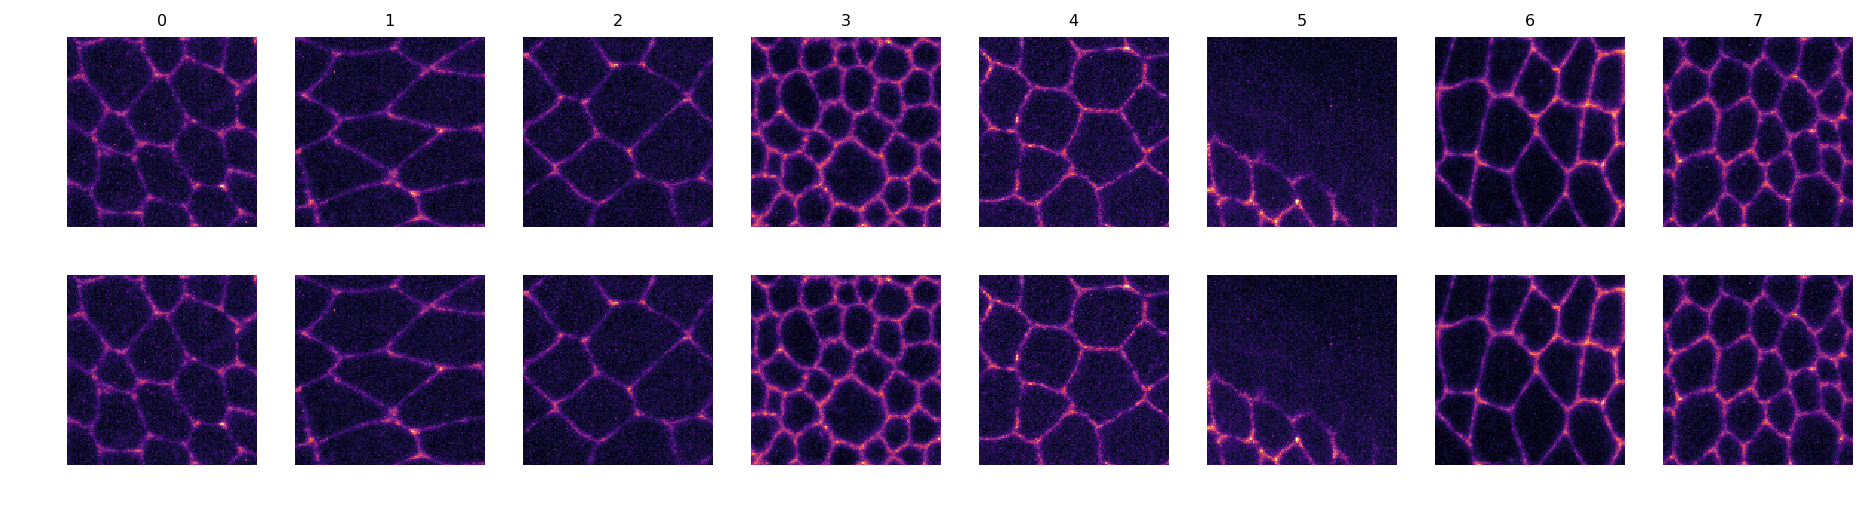

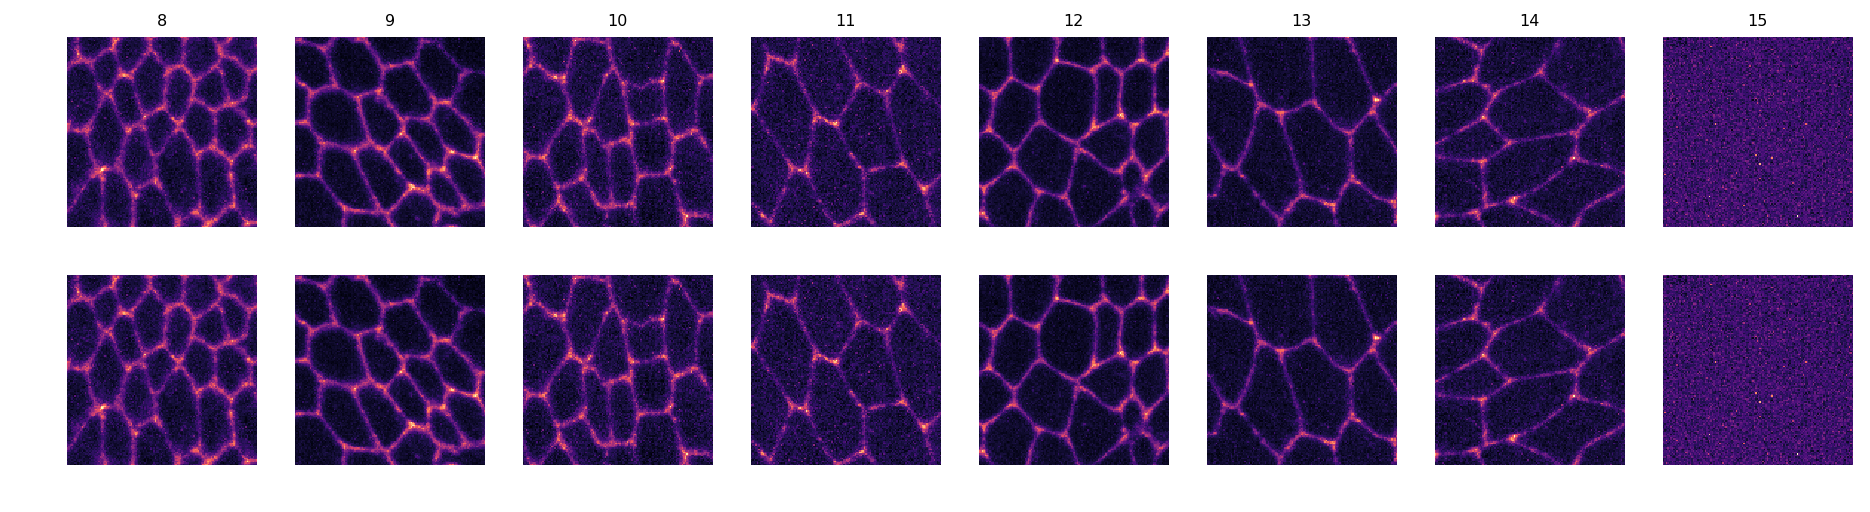

In [4]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;